In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


**NY Spills Data**: This dataset contains records of spills of petroleum and other hazardous materials in New York State. Each row is a single spill record. For each spill there is information regarding date/time, location, type of facility, and source of spill, and time frame of the clean up. 
- Date Source: 2015-10-19 through 2024-11-04 (last updated)
- Date of Access: 2024-11-04

**Counties data**: This dataset is a TIGER shapefile that includes geographic information of the 50 US states and including the District of Columbia, Puerto Rico, and the Island Areas (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the United States Virgin Islands)
- Date Source: All legal boundaries and names are as of January 1, 2023. The 2023 TIGER/Line Shapefiles were released on November 22, 2023.
- Date of Access: 2024-11-04

## 3. Import libraries

In [2]:
# Import libraries 
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Import NY spills 
fp_spill = os.path.join('data', 'Spill_Incidents_20241104.csv')
spills = gpd.read_file(fp_spill)

# Import the US counties 
fp_counties = os.path.join('data', 'tl_2023_us_county.shp')
counties = gpd.read_file(fp_counties)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [4]:
# a. 
# Display all columns 
pd.set_option("display.max.columns", None)

# View head of the `spills` data frame 
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,10/10/2001,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,08/02/2002,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,01/20/2003,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [5]:
# b. 
# View the data types of the `spills` data  
print('Data types of `spills`:\n', spills.dtypes)

Data types of `spills`:
 Spill Number               object
Program Facility Name      object
Street 1                   object
Street 2                   object
Locality                   object
County                     object
ZIP Code                   object
SWIS Code                  object
DEC Region                 object
Spill Date                 object
Received Date              object
Contributing Factor        object
Waterbody                  object
Source                     object
Close Date                 object
Material Name              object
Material Family            object
Quantity                   object
Units                      object
Recovered                  object
geometry                 geometry
dtype: object


In [6]:
# c.
# View unique values in the material_family column in `spills`
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
# d. 
# View the unique values in the county column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

Based on the exploration above, it is evident that the `spills` data set could be easier to use if the column names were cleaned up. There are uppercase words and spaces that will make some functions difficult. Additionally, when viewing the `Spill Date`, `Received Date`, and `Close Date` column, it seems that they are in date time but when looking at the data types it is in object form. Also columns with numeric information (quantity, recovered) are in object form as well. 

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [8]:
# a. 
# Update columns to lower snake case 
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

# Check new column names 
list(spills.columns)

['spill_number',
 'program_facility_name',
 'street_1',
 'street_2',
 'locality',
 'county',
 'zip_code',
 'swis_code',
 'dec_region',
 'spill_date',
 'received_date',
 'contributing_factor',
 'waterbody',
 'source',
 'close_date',
 'material_name',
 'material_family',
 'quantity',
 'units',
 'recovered',
 'geometry']

In [9]:
# b. 
# Update the 3 date columns to date time 
date_columns = ['spill_date', 'received_date', 'close_date']
spills[date_columns]= spills[date_columns].apply(lambda col: pd.to_datetime(col, format = "%m/%d/%Y"))

# Update numeric columns ('quantity' 'recovered')
spills['quantity'] = pd.to_numeric(spills['quantity']).astype(float)
spills['recovered'] = pd.to_numeric(spills['recovered']).astype(float)

# Check the new data types of the columns 
spills.dtypes

spill_number                     object
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                        object
dec_region                       object
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
geometry                       geometry
dtype: object

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# a. 
# Subset for material_name = Petroleum and dates from Jan 1st to Oct 31st 
petr_23 = spills[(spills['material_family'] == "Petroleum") & ((spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] <= '2023-10-31'))]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [11]:
# b. 
# Print to confirm the dates subseted are from Jan to Oct
print(f"This dataframe contains data from the months {petr_23['spill_date'].dt.month.min()} to {petr_23['spill_date'].dt.month.max()}")

# Print to confirm the data is from the year 2023 
print(f"This dataframe contains data during the year {petr_23['spill_date'].dt.year.unique()}")

This dataframe contains data from the months 1 to 10
This dataframe contains data during the year [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [28]:
# c. 
# Does nothing if statement is True 
assert (petr_23['material_family'] == "Petroleum").all()

# Confirmation statement if test passes 
print(f"petr_23 only contains data for petroleum spills" )

petr_23 only contains data for petroleum spills


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [13]:
# Create new data frame that counts the spills per county 
spills_per_county = petr_23.groupby('county').size().rename('n_spills').reset_index()
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [14]:
# a. 
# Check the head of counties
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [15]:
# b. 
# Check the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [16]:
# c. 
# View the CRS of the dataframe 
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

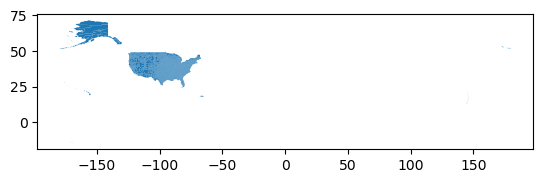

In [17]:
# d. 
# Basic plot of counties 
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

Based on the preliminary exploration, it seems that the geodataframe contains the geometries for all of the counties of the US. The states are labeled by a state code rather than a state name. The initial map is very spread out since it contains affiliated islands in addition to the 50 US states.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [18]:
# Your code here
# Convert column names to lowercase
counties.columns = counties.columns.str.lower()

# Check new column names 
list(counties.columns)

['statefp',
 'countyfp',
 'countyns',
 'geoid',
 'geoidfq',
 'name',
 'namelsad',
 'lsad',
 'classfp',
 'mtfcc',
 'csafp',
 'cbsafp',
 'metdivfp',
 'funcstat',
 'aland',
 'awater',
 'intptlat',
 'intptlon',
 'geometry']

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

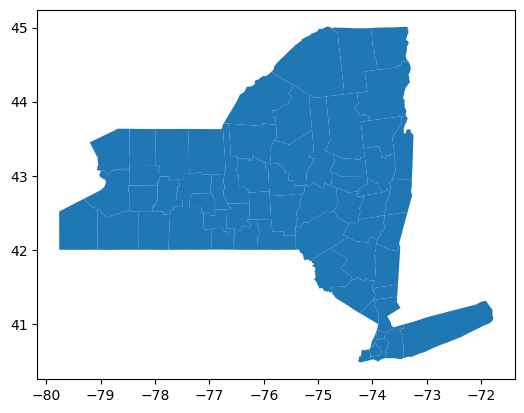

In [35]:
# Subset counties dataframe to only include New York (statefp = 36)
ny_counties = counties[counties['statefp'] == '36']

# Plot ny_counties 
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [20]:
# a.
# View the names of the counties in ny_counties 
print(ny_counties['name'].unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [21]:
# b.
# View the names of the counties in spills_per_county
print(spills_per_county['county'].unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [22]:
# Create a list that includes the counties in spills_per_county that do not appear in ny_counties
diff_names_spills = list(np.setdiff1d(spills_per_county['county'], ny_counties['name']))
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [23]:
# Create a list that includes the counties in ny_counties that do not appear in  spills_per_county
diff_names_ny = list(np.setdiff1d(ny_counties['name'], spills_per_county['county']))
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [24]:
# e. 
# Detemine the number of spills in Tuscarora Indian Reservation
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']['n_spills'].sum()

1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [25]:
# Update St Lawrence to St. Lawrence
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Check the update was successful 
assert "St. Lawrence" in spills_per_county['county'].values, 'Failed: St. Lawrence not found'
assert "St Lawrence" not in spills_per_county['county'].values, 'Failed, St Lawrence still included'

# Print confirmation if it did work 
print("Update successful")

Update successful


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [40]:
# a. 
# Rename 'name' column in ny_counties to 'county'
ny_counties = ny_counties.rename(columns={'name': 'county'})

# View the data frame with updated column name 
ny_counties.head(2)

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."


In [41]:
# b. 
# Turn ny_counties into a join between ny_counties and spills_per_county
ny_counties = pd.merge(ny_counties, spills_per_county, how = 'inner', on='county')

# View merged dataframe 
ny_counties.head(3)

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",161
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [51]:
# c. 
# View the number of spills in Niagara before adding 1
niagara_pre = ny_counties.loc[ny_counties['county'] == "Niagara", 'n_spills'].values[0]
print(f"The number of spills in Niagara before including Tuscarora Indian Reservation: {niagara_pre}")

The number of spills in Niagara before including Tuscarora Indian Reservation: 88


In [52]:
# Update Niagara to increase spills by 1 (89 spills)
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# Store value of Niagara spills 
niagara_post = ny_counties.loc[ny_counties['county'] == "Niagara", 'n_spills'].values[0]

# View the number of spills after the increase 
print(f"The number of spills in Niagara before including Tuscarora Indian Reservation: {niagara_post}")

The number of spills in Niagara before including Tuscarora Indian Reservation: 89


<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



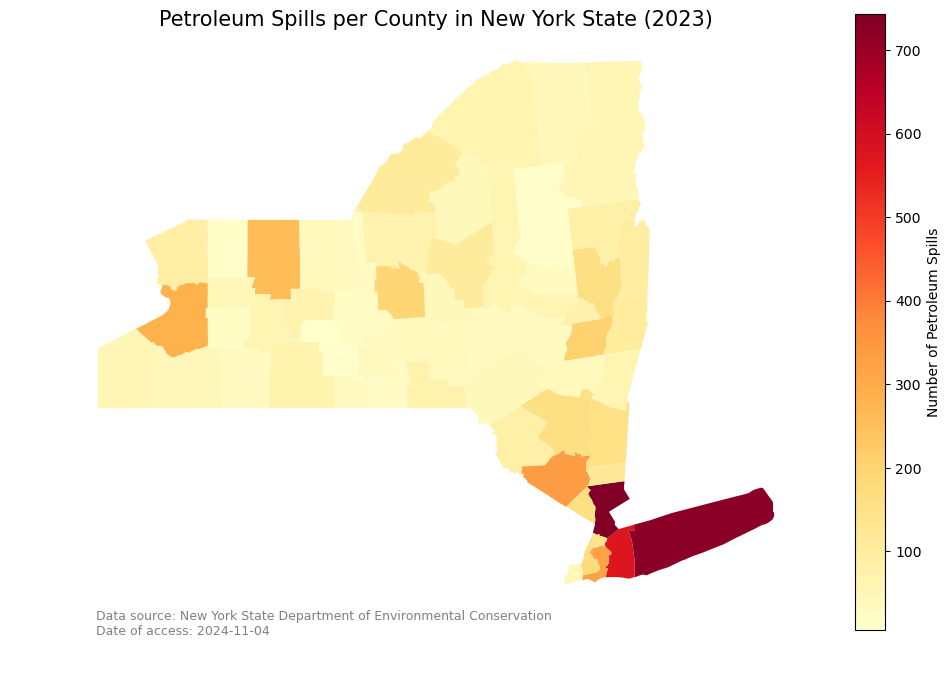

In [61]:
# a. 
# Create the map of the spills per county 

fig, ax = plt.subplots(1, 1, figsize=(12,8))

ny_counties.plot(ax=ax,
                column='n_spills',
                cmap = 'YlOrRd',
                legend=True,
                 legend_kwds={'label': "Number of Petroleum Spills", 'orientation': "vertical"})

plt.title("Petroleum Spills per County in New York State (2023)", fontsize=15)
ax.annotate("Data source: New York State Department of Environmental Conservation\nDate of access: 2024-11-04",
            xy=(0.08, .06), xycoords='figure fraction', fontsize=9, color='gray')

ax.set_axis_off()
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

*Your answer here*

In [63]:
# Determine the top 3 counties with petroleum spills 
top_3 = ny_counties[['county', 'n_spills']].sort_values(by='n_spills', ascending=False).head(3)
top_3

,county,n_spills
23,Westchester,743
8,Suffolk,723
20,Nassau,576


**Figure Caption**: Choropleth map of the number of petroleum spills per county in New York in 2023 (according to the New York State Department of Environmental Conservation). The color gradient relates to the total count of spills, with the darker red indicating higher spill counts. The counties with the largest number of spills for the year are Westchester (743 spills), Suffolf (723 spills), and Nassau (576 spills). 